In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
main_dir = '/content/drive/MyDrive/Gray7'
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_Flavus_dir = os.path.join(train_dir,'Flavus')
train_Fumigatus_dir = os.path.join(train_dir,'Fumigatus')
test_Flavus_dir = os.path.join(test_dir,'Flavus')
test_Fumigatus_dir = os.path.join(test_dir,'Fumigatus')

In [ ]:
print(train_dir,train_Flavus_dir)

/content/drive/MyDrive/Gray7/train /content/drive/MyDrive/Gray7/train/Flavus


In [ ]:
train_Flavus_names = os.listdir(train_Flavus_dir)
print(train_Flavus_names[:10])

train_Fumigatus_names = os.listdir(train_Fumigatus_dir)
print(train_Fumigatus_names[:10])

test_Flavus_names = os.listdir(test_Flavus_dir)
print(test_Flavus_names[:10])

test_Fumigatus_names = os.listdir(test_Fumigatus_dir)
print(test_Fumigatus_names[:10])

['Image_924(9).jpg', 'Image_914(1).jpg', 'Image_911(2).jpg', 'Image_916(1).jpg', 'Image_916(2).jpg', 'Image_916(3).jpg', 'Image_916(4).jpg', 'Image_916(5).jpg', 'Image_916(6).jpg', 'Image_916(7).jpg']
['Image_961(14).jpg', 'Image_961(15).jpg', 'Image_961(16).jpg', 'Image_961(17).jpg', 'Image_961(18).jpg', 'Image_961(19).jpg', 'Image_961(20).jpg', 'Image_961(21).jpg', 'Image_962(24).jpg', 'Image_962(25).jpg']
['Image_859(1).jpg', 'Image_859(2).jpg', 'Image_859(3).jpg', 'Image_859(4).jpg', 'Image_859(5).jpg', 'Image_862(1).jpg', 'Image_862(2).jpg', 'Image_862(3).jpg', 'Image_862(4).jpg', 'Image_862(5).jpg']
['Image_986(1).jpg', 'Image_986(2).jpg', 'Image_986(3).jpg', 'Image_986(4).jpg', 'Image_986(5).jpg', 'Image_986(11).jpg', 'Image_986(12).jpg', 'Image_986(13).jpg', 'Image_967(1).jpg', 'Image_967(2).jpg']


In [ ]:
print("train dataset Flavus images :",len(train_Flavus_names))
print("train dataset Fumigatus images :",len(train_Fumigatus_names))
print("test dataset Flavus images :",len(test_Flavus_names))
print("test dataset Fumigatus images :",len(test_Fumigatus_names))
print("Total train images :",len(train_Flavus_names+train_Fumigatus_names))
print("Total test images :",len(test_Flavus_names+test_Fumigatus_names))

train dataset Flavus images : 420
train dataset Fumigatus images : 420
test dataset Flavus images : 105
test dataset Fumigatus images : 105
Total train images : 840
Total test images : 210


['/content/drive/MyDrive/Gray7/train/Flavus/Image_924(9).jpg', '/content/drive/MyDrive/Gray7/train/Flavus/Image_914(1).jpg', '/content/drive/MyDrive/Gray7/train/Flavus/Image_911(2).jpg', '/content/drive/MyDrive/Gray7/train/Flavus/Image_916(1).jpg', '/content/drive/MyDrive/Gray7/train/Flavus/Image_916(2).jpg', '/content/drive/MyDrive/Gray7/train/Flavus/Image_916(3).jpg', '/content/drive/MyDrive/Gray7/train/Flavus/Image_916(4).jpg', '/content/drive/MyDrive/Gray7/train/Flavus/Image_916(5).jpg']
['/content/drive/MyDrive/Gray7/train/Fumigatus/Image_961(14).jpg', '/content/drive/MyDrive/Gray7/train/Fumigatus/Image_961(15).jpg', '/content/drive/MyDrive/Gray7/train/Fumigatus/Image_961(16).jpg', '/content/drive/MyDrive/Gray7/train/Fumigatus/Image_961(17).jpg', '/content/drive/MyDrive/Gray7/train/Fumigatus/Image_961(18).jpg', '/content/drive/MyDrive/Gray7/train/Fumigatus/Image_961(19).jpg', '/content/drive/MyDrive/Gray7/train/Fumigatus/Image_961(20).jpg', '/content/drive/MyDrive/Gray7/train/Fumi

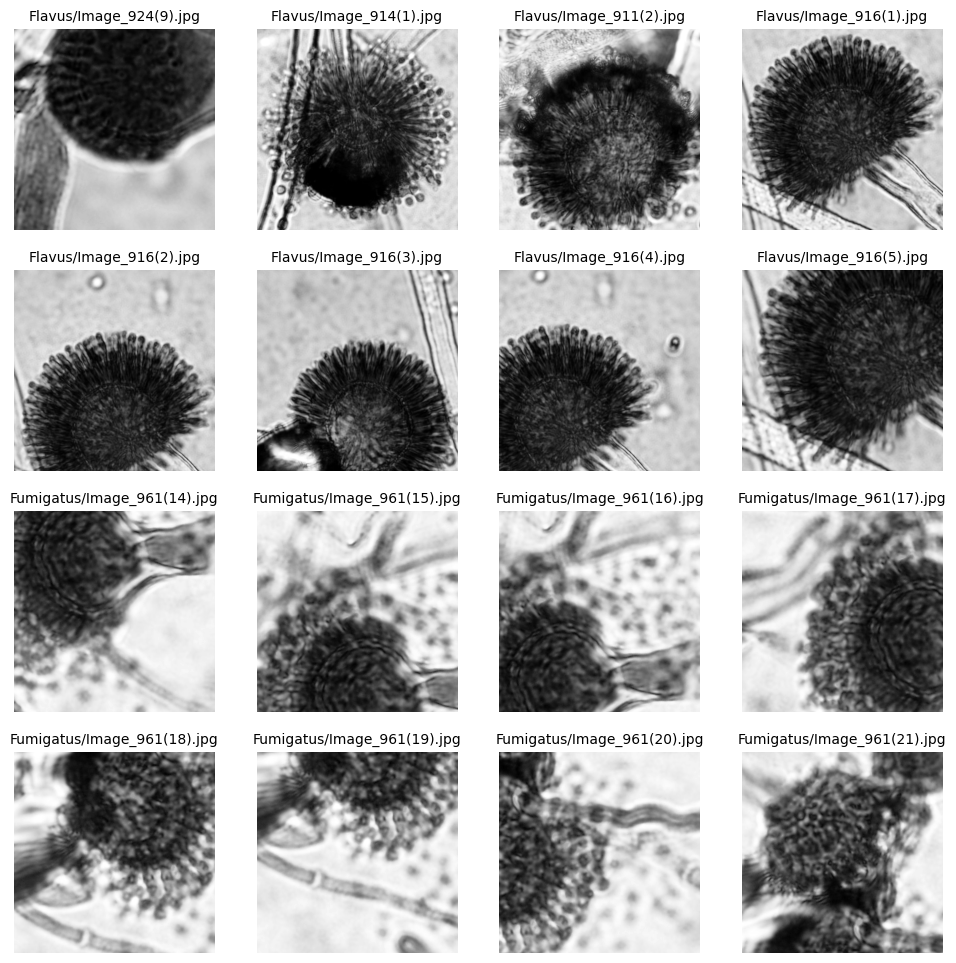

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames
next_Flavus_pic = [os.path.join(train_Flavus_dir,fname)for fname in train_Flavus_names[0:8]]
next_Fumigatus_pic = [os.path.join(train_Fumigatus_dir,fname)for fname in train_Fumigatus_names[0:8]]

#print the list
print(next_Flavus_pic)
print(next_Fumigatus_pic)

for i , img_path in enumerate(next_Flavus_pic+next_Fumigatus_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   horizontal_flip = True)

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (500,500),
                                                    subset = 'training',
                                                    batch_size = 14,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (500,500),
                                                    subset = 'validation',
                                                    batch_size = 14,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (500,500),
                                                    batch_size = 14,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'binary')

Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Flavus': 0, 'Fumigatus': 1}

In [ ]:
train_generator.image_shape

(500, 500, 1)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

model.add(Conv2D(32,(5, 5),padding='SAME',activation='relu',input_shape=(500,500,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5, 5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5, 5),padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 500, 500, 32)      832       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 250, 250, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 250, 250, 32)      25632     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 125, 125, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 121, 121, 32)      25632     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 60, 60, 32)     

In [ ]:
#compile the model

from tensorflow import keras
from keras.optimizers import RMSprop
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode = 'min',
    verbose = 1,
    patience=25,
)

In [ ]:
#train the model
history = model.fit(train_generator,
                              epochs=1000,
                              validation_data = validation_generator,
                              validation_steps = 12,
                              callbacks=[early_stopping])

Epoch 1/1000
48/48 [==============================] - 28s 483ms/step - loss: 2.2090 - accuracy: 0.5030 - val_loss: 0.6871 - val_accuracy: 0.5952
Epoch 2/1000
48/48 [==============================] - 23s 471ms/step - loss: 0.7663 - accuracy: 0.5253 - val_loss: 0.7056 - val_accuracy: 0.5000
Epoch 3/1000
48/48 [==============================] - 23s 482ms/step - loss: 0.7035 - accuracy: 0.5818 - val_loss: 0.6300 - val_accuracy: 0.7143
Epoch 4/1000
48/48 [==============================] - 25s 527ms/step - loss: 0.6735 - accuracy: 0.6414 - val_loss: 0.4672 - val_accuracy: 0.8631
Epoch 5/1000
48/48 [==============================] - 25s 519ms/step - loss: 0.6327 - accuracy: 0.6979 - val_loss: 0.3604 - val_accuracy: 0.8810
Epoch 6/1000
48/48 [==============================] - 22s 461ms/step - loss: 0.5015 - accuracy: 0.7902 - val_loss: 0.2745 - val_accuracy: 0.8810
Epoch 7/1000
48/48 [==============================] - 22s 466ms/step - loss: 0.4573 - accuracy: 0.8199 - val_loss: 0.2875 - val_ac

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Kayıp')

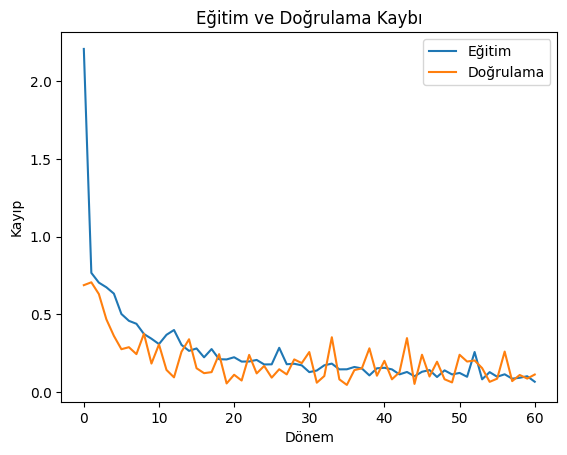

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Dönem')
plt.ylabel('Kayıp')

Text(0, 0.5, 'Doğruluk')

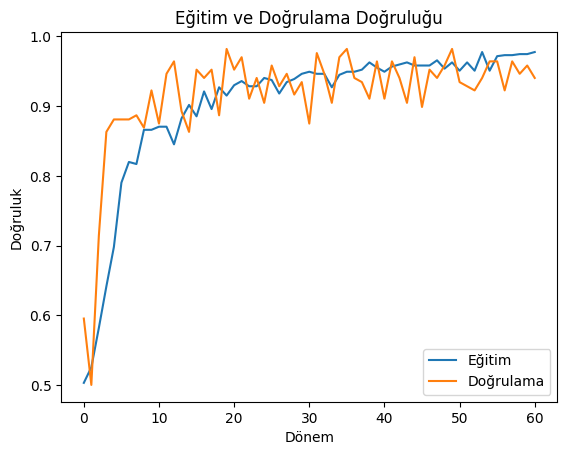

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Dönem')
plt.ylabel('Doğruluk')

Text(0, 0.5, 'loss')

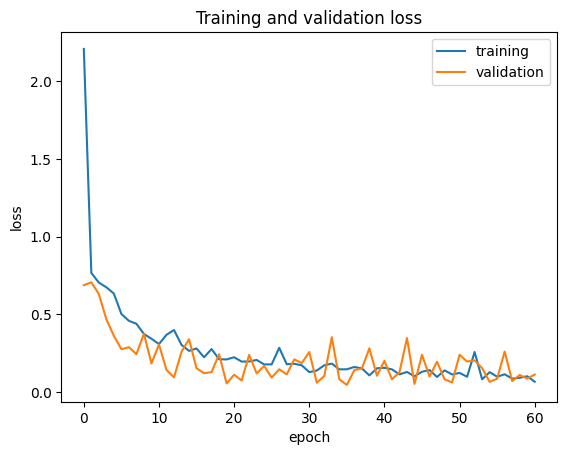

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

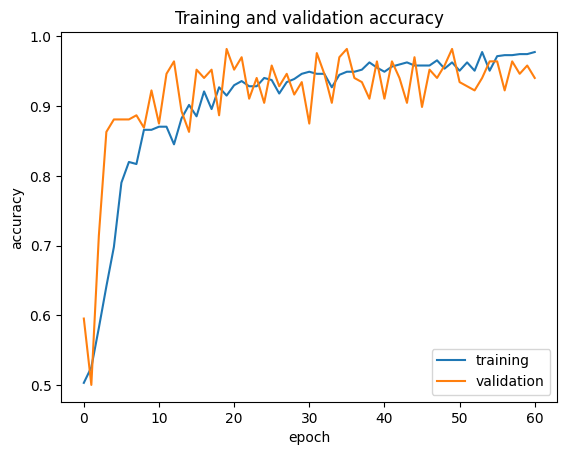

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
#test accuracy
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

15/15 [==============================] - 73s 5s/step - loss: 0.4213 - accuracy: 0.9095
test acc :0.9095237851142883 test loss:0.42130759358406067


In [ ]:
import numpy as np
from tensorflow import keras
from google.colab import files
from keras.utils import load_img
from keras.utils import img_to_array
from keras.backend import expand_dims

#flavus test
uploaded = files.upload()
for fn in uploaded.keys():
    path = '/content/' + fn
    print(path)
    img = load_img(path, color_mode='grayscale', target_size=(500, 500))
    x = img_to_array(img)
    x = expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=14)
    print(fn)
    if classes == 0:
        print('Flavus')
    else:
        print('Fumigatus')

Saving Image_860(1).jpg to Image_860(1) (1).jpg
Saving Image_860(2).jpg to Image_860(2) (1).jpg
Saving Image_860(3).jpg to Image_860(3) (1).jpg
Saving Image_860(4).jpg to Image_860(4) (1).jpg
Saving Image_860.jpg to Image_860 (1).jpg
Saving Image_861(1).jpg to Image_861(1) (1).jpg
Saving Image_861(2).jpg to Image_861(2) (1).jpg
Saving Image_861(3).jpg to Image_861(3) (1).jpg
Saving Image_861(4).jpg to Image_861(4) (1).jpg
Saving Image_861.jpg to Image_861 (1).jpg
Saving Image_868(1).jpg to Image_868(1) (1).jpg
Saving Image_868(2).jpg to Image_868(2) (1).jpg
Saving Image_868(3).jpg to Image_868(3) (1).jpg
Saving Image_868(4).jpg to Image_868(4) (1).jpg
Saving Image_868(5).jpg to Image_868(5) (1).jpg
Saving Image_868.jpg to Image_868 (1).jpg
Saving Image_869(1).jpg to Image_869(1) (1).jpg
Saving Image_869(2).jpg to Image_869(2) (1).jpg
Saving Image_869(3).jpg to Image_869(3) (1).jpg
Saving Image_869(4).jpg to Image_869(4) (1).jpg
Saving Image_869(5).jpg to Image_869(5) (1).jpg
Saving Ima

In [ ]:
import numpy as np
from tensorflow import keras
from google.colab import files
from keras.utils import load_img
from keras.utils import img_to_array
from keras.backend import expand_dims

#fumigatus test
uploaded = files.upload()
for fn in uploaded.keys():
    path = '/content/' + fn
    print(path)
    img = load_img(path, color_mode='grayscale', target_size=(500, 500))
    x = img_to_array(img)
    x = expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=14)
    print(fn)
    if classes == 0:
        print('Flavus')
    else:
        print('Fumigatus')

Saving Image_958(1).jpg to Image_958(1) (1).jpg
Saving Image_958(2).jpg to Image_958(2) (1).jpg
Saving Image_958(3).jpg to Image_958(3) (1).jpg
Saving Image_958(4).jpg to Image_958(4) (1).jpg
Saving Image_958(5).jpg to Image_958(5) (1).jpg
Saving Image_958(6).jpg to Image_958(6) (1).jpg
Saving Image_958(7).jpg to Image_958(7) (1).jpg
Saving Image_958.jpg to Image_958 (1).jpg
Saving Image_959(1).jpg to Image_959(1) (1).jpg
Saving Image_959(2).jpg to Image_959(2) (1).jpg
Saving Image_959(3).jpg to Image_959(3) (1).jpg
Saving Image_959(4).jpg to Image_959(4) (1).jpg
Saving Image_959(5).jpg to Image_959(5) (1).jpg
Saving Image_959(6).jpg to Image_959(6) (1).jpg
Saving Image_959(7).jpg to Image_959(7) (1).jpg
Saving Image_959.jpg to Image_959 (1).jpg
Saving Image_977(1).jpg to Image_977(1) (1).jpg
Saving Image_977(2).jpg to Image_977(2) (1).jpg
Saving Image_977(3).jpg to Image_977(3) (1).jpg
Saving Image_977(4).jpg to Image_977(4) (1).jpg
Saving Image_977(5).jpg to Image_977(5) (1).jpg
Savi

In [ ]:
import numpy as np
from tensorflow import keras
from google.colab import files
from keras.utils import load_img
from keras.utils import img_to_array
from keras.backend import expand_dims

#flavus train
uploaded = files.upload()
for fn in uploaded.keys():
    path = '/content/' + fn
    print(path)
    img = load_img(path, color_mode='grayscale', target_size=(500, 500))
    x = img_to_array(img)
    x = expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=14)
    print(fn)
    if classes == 0:
        print('Flavus')
    else:
        print('Fumigatus')

Saving Image_859(1).jpg to Image_859(1).jpg
Saving Image_859(2).jpg to Image_859(2).jpg
Saving Image_859(3).jpg to Image_859(3).jpg
Saving Image_859(4).jpg to Image_859(4).jpg
Saving Image_859(5).jpg to Image_859(5).jpg
Saving Image_859.jpg to Image_859.jpg
Saving Image_862(1).jpg to Image_862(1).jpg
Saving Image_862(2).jpg to Image_862(2).jpg
Saving Image_862(3).jpg to Image_862(3).jpg
Saving Image_862(4).jpg to Image_862(4).jpg
Saving Image_862(5).jpg to Image_862(5).jpg
Saving Image_862(6).jpg to Image_862(6).jpg
Saving Image_862.jpg to Image_862.jpg
Saving Image_863(1).jpg to Image_863(1).jpg
Saving Image_863(2).jpg to Image_863(2).jpg
Saving Image_863(3).jpg to Image_863(3).jpg
Saving Image_863.jpg to Image_863.jpg
Saving Image_864(1).jpg to Image_864(1).jpg
Saving Image_864(2).jpg to Image_864(2).jpg
Saving Image_864(3).jpg to Image_864(3).jpg
Saving Image_864(4).jpg to Image_864(4).jpg
Saving Image_864(5).jpg to Image_864(5).jpg
Saving Image_864(6).jpg to Image_864(6).jpg
Saving

In [ ]:
import numpy as np
from tensorflow import keras
from google.colab import files
from keras.utils import load_img
from keras.utils import img_to_array
from keras.backend import expand_dims

#fumigatus train
uploaded = files.upload()
for fn in uploaded.keys():
    path = '/content/' + fn
    print(path)
    img = load_img(path, color_mode='grayscale', target_size=(500, 500))
    x = img_to_array(img)
    x = expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=14)
    print(fn)
    if classes == 0:
        print('Flavus')
    else:
        print('Fumigatus')

Saving Image_960(1).jpg to Image_960(1).jpg
Saving Image_960(2).jpg to Image_960(2).jpg
Saving Image_960(3).jpg to Image_960(3).jpg
Saving Image_960(4).jpg to Image_960(4).jpg
Saving Image_960(5).jpg to Image_960(5).jpg
Saving Image_960(6).jpg to Image_960(6).jpg
Saving Image_960(7).jpg to Image_960(7).jpg
Saving Image_960(8).jpg to Image_960(8).jpg
Saving Image_960(9).jpg to Image_960(9).jpg
Saving Image_960(10).jpg to Image_960(10).jpg
Saving Image_960(11).jpg to Image_960(11).jpg
Saving Image_960(12).jpg to Image_960(12).jpg
Saving Image_960(13).jpg to Image_960(13).jpg
Saving Image_960(14).jpg to Image_960(14).jpg
Saving Image_960(15).jpg to Image_960(15).jpg
Saving Image_960(16).jpg to Image_960(16).jpg
Saving Image_960(17).jpg to Image_960(17).jpg
Saving Image_960(18).jpg to Image_960(18).jpg
Saving Image_960(19).jpg to Image_960(19).jpg
Saving Image_960.jpg to Image_960.jpg
Saving Image_961(1).jpg to Image_961(1).jpg
Saving Image_961(2).jpg to Image_961(2).jpg
Saving Image_961(3